# H0 = network latency has not changed
# Ha = network latency went up
-- true positive would be that latency went up and we rejected the null
-- type 1 error would be that we rejected the null when latency did not change

-- true negative would be that we fail to reject the null and latency didnt change
-- type 2 error would be that we fail to reject null and the latency went up


# H0 = the website design is neutral
# Ha = the website design is good
-- true positive would be that website is good and we rejected the null
-- type 1 error would be that we rejected the null when website is neutral

-- true negative would be that we fail to reject the null and website is neutral
-- type 2 error would be that we fail to reject null and website is good


# H0 = television ad is not affecting sales
# Ha = television ad is driving revenue
-- true positive would be that television ads are driving revenue and we rejected the null
-- type 1 error would be that we rejected the null when television ads did not affect revenue

-- true negative would be that we fail to reject the null and television ads did not affect revenue
-- type 2 error would be that we fail to reject null and television ads affected revenue 


## Central limit theorem
- a population that is not necessarily normally distributed
- taking samples will result in normally distributed

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(123)

In [2]:
# Define a roll [1,2,3,4,5,6]
n_dice_per_experiment = ncols = 10
n_experiment = nrows = 100

#100 rows and 10 columns, from numbers 1-6
data = np.random.randint(1, 7, (nrows, ncols))

#this gives number of columns in data array
data [:4]

array([[6, 3, 5, 3, 2, 4, 3, 4, 2, 2],
       [1, 2, 2, 1, 1, 2, 4, 6, 5, 1],
       [1, 5, 2, 4, 3, 5, 3, 5, 1, 6],
       [1, 2, 4, 5, 5, 5, 2, 6, 4, 3]])

In [3]:
#take the mean of each row:
calculated_mean_of_rows = data.mean(axis = 1)
calculated_mean_of_rows

array([3.4, 2.5, 3.5, 3.7, 3.2, 4.7, 3.4, 3.2, 3.4, 3. , 3.7, 3.5, 4. ,
       4.5, 2.9, 2.8, 2.9, 3.8, 3.2, 3.6, 3.4, 4. , 3.5, 3.3, 3.6, 3. ,
       4.3, 3. , 3.3, 3.2, 4.2, 3.9, 3.2, 3.8, 3.6, 3.4, 2.7, 3.4, 3.2,
       3.1, 3.2, 3. , 4.1, 3.3, 3. , 4.1, 3.4, 3.3, 2.9, 3.8, 3.4, 3.6,
       3.9, 3.2, 4.7, 3.8, 3.5, 2.8, 3.8, 4.7, 4.1, 3.5, 2.8, 3.7, 3.4,
       3.7, 3.6, 4.1, 3.6, 3.5, 2.9, 4. , 3.2, 3.4, 4.4, 2.9, 3.2, 3.9,
       1.9, 3. , 3. , 3.5, 3.3, 4.4, 3.4, 4.2, 4.1, 3.2, 3.5, 3.5, 3.8,
       3.1, 3.6, 2.9, 2.9, 4. , 3.3, 3.1, 3.4, 3.6])

Text(0, 0.5, 'Number of Outcomes')

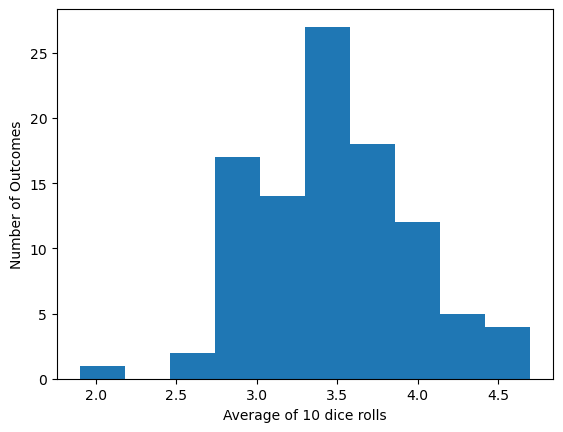

In [4]:
plt.hist(calculated_mean_of_rows)
plt.xlabel(f'Average of {n_dice_per_experiment} dice rolls')
plt.ylabel('Number of Outcomes')

## One sample T-test
1. Plot distributions
2. Establish hypothesis

In [5]:
import env

In [6]:
url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/telco_churn'
query = 'select * from customers'



In [7]:
df = pd.read_sql(query, url)

In [8]:
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,Yes,No,No,2,No,2,55.15,742.9,No
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,No,Yes,1,Yes,1,85.10,1873.7,Yes
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,No,1,Yes,2,50.30,92.75,No
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,Yes,No,Yes,3,No,2,67.85,4627.65,No


In [9]:
df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn'],
      dtype='object')

<AxesSubplot:>

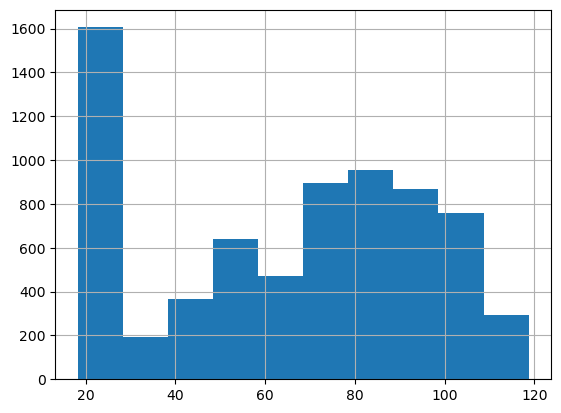

In [10]:
df.monthly_charges.hist()

<AxesSubplot:>

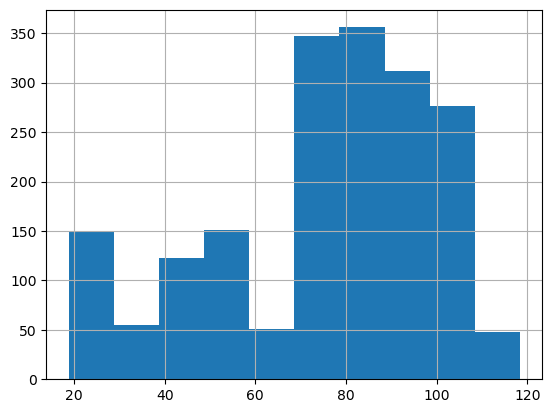

In [11]:
# give us a df that filters churn column for yes
churn_sample = df[df.churn == 'Yes'].monthly_charges
churn_sample.hist()

In [12]:
churn_sample

2       73.90
3       98.00
4       83.90
18      62.70
19      25.10
        ...  
7020    96.80
7023    83.85
7036    70.15
7037    20.95
7039    85.10
Name: monthly_charges, Length: 1869, dtype: float64

## set hypothesis
H_0: mean of monthly charged of churned customers <= mean of 
    monthly charges of all customers

H_a: mean of monthly charges of chruned customers > mean of 
    monthly charges of all customers
    
alpha value = 0.05
    
        
        

In [13]:
#sample size:
df.churn.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

In [14]:
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,Yes,No,No,2,No,2,55.15,742.9,No
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,No,Yes,1,Yes,1,85.10,1873.7,Yes
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,No,1,Yes,2,50.30,92.75,No
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,Yes,No,Yes,3,No,2,67.85,4627.65,No


In [15]:
churn_sample = df[df.churn == 'Yes'].monthly_charges
## filters df to only show rows that have yes for churn, 
## then the .monthly_charges shows only the monthly_charges column

In [16]:
overall_mean = df.monthly_charges.mean()

In [17]:
t, p = stats.ttest_1samp(churn_sample, overall_mean)
alpha = .05
print(t, p/2, alpha)

16.96540308050567 1.8703196496911995e-60 0.05


In [18]:
if p/2 > alpha:
    print("We fail to reject null hypothesis")

elif t < 0:
    print("We fail to reject $H_{0}$")

else:
    print("We reject $H_{0}$")

We reject $H_{0}$


In [19]:
dfflowers = sns.load_dataset('iris')
dfflowers.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [20]:
dfflowers.sepal_length.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [21]:
versicolor_sepal_length = dfflowers[dfflowers.species == 'versicolor'].sepal_length
virginica_sepal_length = dfflowers[dfflowers.species == 'virginica'].sepal_length
setosa_sepal_length = dfflowers[dfflowers.species == 'setosa'].sepal_length

<AxesSubplot:>

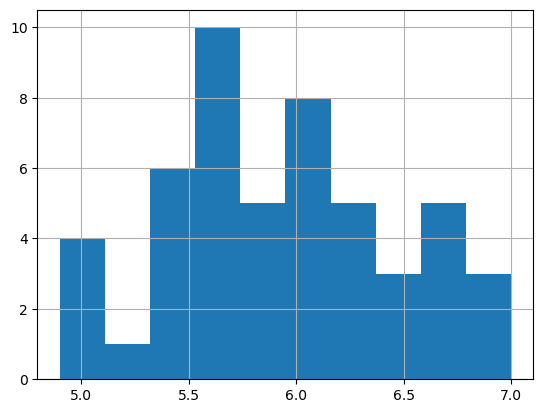

In [22]:
versicolor_sepal_length.hist()

<AxesSubplot:>

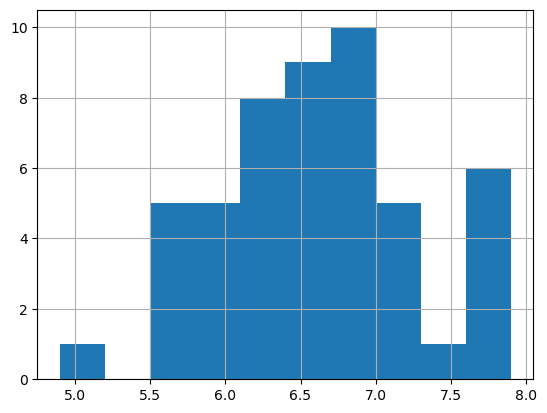

In [23]:
virginica_sepal_length.hist()

<AxesSubplot:>

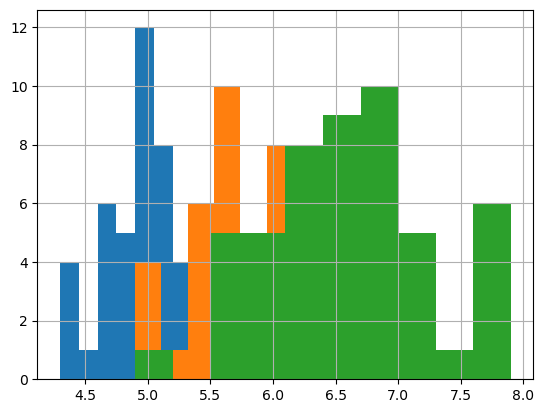

In [24]:
setosa_sepal_length.hist()
versicolor_sepal_length.hist()
virginica_sepal_length.hist()

In [25]:
stats.levene(versicolor_sepal_length, virginica_sepal_length,\
            setosa_sepal_length)

LeveneResult(statistic=6.352720020482689, pvalue=0.0022585277836218586)

In [26]:
import seaborn as sns
mpg = sns.load_dataset('mpg')

In [27]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [28]:
mpg = mpg[~mpg.horsepower.isna()]

In [29]:
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [30]:
mpg.origin.value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

In [31]:
USA = mpg[mpg['origin'] == 'usa'].horsepower
japan = mpg[mpg['origin'] == 'japan'].horsepower
europe = mpg[mpg['origin'] == 'europe'].horsepower

Is the horsepower of vehicles different across the distint origins of the vehicles?
$H_{0}$: mean_horsepower_USA == mean_horsepower_japan == mean_horsepower_europe

$H_{a}$: mean horsepowers from at least 2 countries are significantly different

Assumptions:
1. At least 30 observations: met (see value counts above)

2. groups are independent

3. equal population variance

In [32]:
stats.levene(USA, \
             japan, europe)

LeveneResult(statistic=26.526632103545772, pvalue=1.5863075873913356e-11)

 the low p value means that the variances are signifigantly different
 from eachother and therefor cannot use ANOVA test
 
 use Kruskal-Wallis

In [118]:
t, p = stats.kruskal(USA, japan, europe)

In [119]:
p

1.1759521262123952e-23

with a p-value < 0.05, we can say there is a signifigant difference
between the horsepower of all the vehicles made in the countries

In [120]:
t, p = stats.ttest_ind(japan, europe, equal_var = False)

In [121]:
p

0.8193616065509621

Exercises

Answer with the type of test you would use (assume normal distribution):


## Exercise 1
1. Is there a difference in grades of students on the second floor compared to grades of all students?
        Ue a One sampe t-test


2. Are adults who drink milk taller than adults who dont drink milk?
        Independent t-test or 2-sample t-test

3. Is the the price of gas higher in texas or in new mexico?
        Independent t-test

4. Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?
        ANOVA test

Load the mpg dataset and use it to answer the following questions:

1. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?


2. Are compact cars more fuel-efficient than the average car?


3. Do manual cars get better gas mileage than automatic cars?

In [122]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,transmission
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,auto
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,auto
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,manual
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,auto
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,manual


In [123]:
mpg = sns.load_dataset('mpg')

In [124]:
from pydataset import data

In [125]:
mpg = data('mpg')

In [126]:
data('mpg', show_doc = True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [127]:
mpg['avg_fuel_eff'] = (mpg.cty + mpg.hwy) / 2

In [128]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fuel_eff
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [129]:
y2008 = mpg[mpg['year'] == 2008].avg_fuel_eff
y1999 = mpg[mpg['year'] == 1999].avg_fuel_eff

<AxesSubplot:>

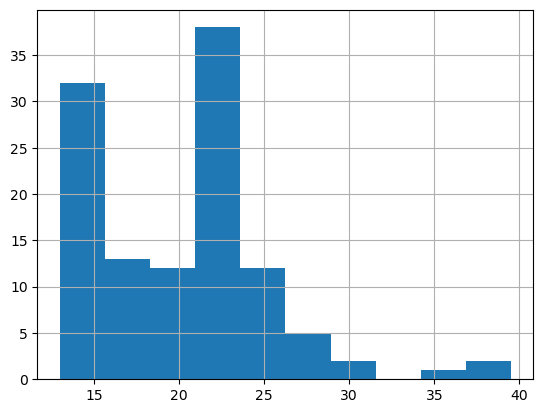

In [130]:
y1999.hist()

In [131]:
t, p = stats.wilcoxon(y1999, y2008)

In [132]:
p

0.9096958349129208

In [133]:
alpha = 0.05

if p <= alpha:
    print('Reject null')
else:
    print('Fail to reject null')

Fail to reject null


## Question 1 between 1999 and 2008

no, there is no difference between fuel efficeinty of cars
vs 1999 and 2008

In [134]:
compact = mpg[mpg['class'] == 'compact'].avg_fuel_eff
overall_mean = mpg.avg_fuel_eff.mean()

In [135]:
t, p = stats.ttest_1samp(compact, overall_mean)

In [136]:
alpha = 0.05

if p and t > 0 <= alpha:
    print('Reject null')
else:
    print('Fail to reject null')

Reject null


# question 2  about compact cars

yes, there is a signifigant difference between compact car and overall mean

In [137]:
manual = mpg[mpg['trans'].str.startswith('m')].avg_fuel_eff
auto = mpg[mpg['trans'].str.startswith('a')].avg_fuel_eff

In [138]:
t, p = stats.ttest_ind(manual, auto, equal_var = False)

In [139]:
alpha = 0.05

if t > 0 and p <= alpha:
    print('Reject null')
else:
    print('Fail to reject null')

Reject null


# Question 3 answer about transmission

yes, there is a signifigant difference between manual and automatic 
 transmission cars


# question 2

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.



In [140]:
np.random.seed(42)
office1 = np.random.normal(90, 15, size = 40)
office2 = np.random.normal(100, 20, size = 50)

In [141]:
t, p = stats.ttest_ind(office2, office1)

In [142]:
t

3.734403689163024

In [143]:
p

0.0003334050750996025

yes, the means are different

In [144]:
alpha = 0.05

if p <= alpha:
    print('Reject null')
else:
    print('Fail to reject null')

Reject null


# Correlation Exercises

Answer with the type of stats test you would use (assume normal distribution):

Is there a relationship between the length of your arm and the length of your foot?
    
    pearson's r test

Do guys and gals quit their jobs at the same rate?
    
    independent t test

Does the length of time of the lecture correlate with a students grade?
    
    pearson's r test

In [145]:
import env
def get_db_url(username, password, host, db):
    return f'mysql+pymysql://{username}:{password}@{host}/{db}'

    
    
    

In [146]:
url = get_db_url(env.username, env.password, env.host, db='telco_churn')
query = 'select * from customers'




In [147]:
df = pd.read_sql(query, url)




# Does tenure correlate with monthly charges?

Does tenure correlate with monthly charges?

state our hypothesis, set our alpha value.

select the data

plot the data

test for assumptions (normal distribution for correlation)

run test

draw conclusions

Hypothesis:

H_0: there is no linear correlation between tenure and monthly charges. 

H_a: there is a linear correlation between tenure and monthly charges.

<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

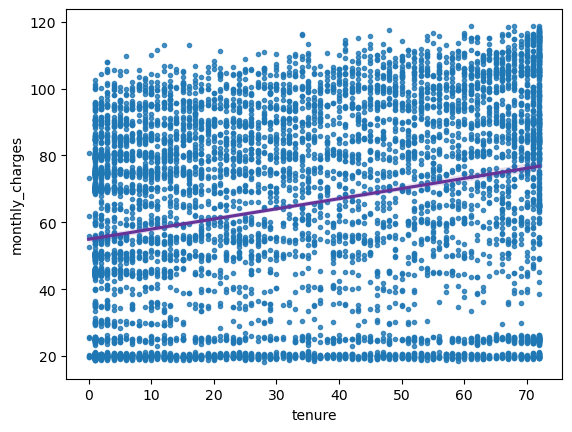

In [148]:
charges_df = df[['monthly_charges','tenure']]

sns.regplot(x='tenure', y='monthly_charges', 
            data=charges_df, marker='.', 
            line_kws={'color': 'rebeccapurple'})

<AxesSubplot:>

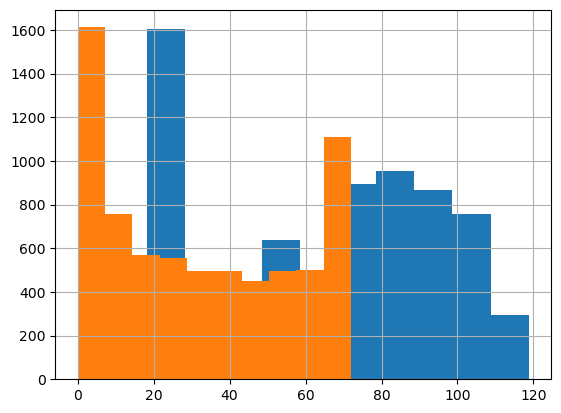

In [149]:
charges_df.monthly_charges.hist()
charges_df.tenure.hist()

#### These distributions are not normal

In [150]:
alpha = 0.05
r, p = stats.spearmanr(charges_df.tenure, charges_df.monthly_charges)

def eval_result(alpha, p):
    if p < alpha:
        return print(f'Reject the null hypothesis. There is a linear correlation (p-value: {p})')
    else:
        return print(f'We fail to reject the null hypothesis that there is a linear correlation (p-value: {p})')


In [151]:
eval_result(alpha, p)
r

Reject the null hypothesis. There is a linear correlation (p-value: 1.0271266876409408e-123)


0.27641678933130215

### There is a correlation between monthly charges and tenure. With an r of .28, we can say the correlation is "weak-moderate"

## 2b Total charges?

Hypothesis:

H_0: There is no linear correlation between tenure and total charges.

H_a: There is a linear correlation between tenure and total charges.

In [152]:
alpha = 0.05
ttotal_charges_df = df[['tenure','total_charges']]

In [153]:
ttotal_charges_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tenure         7043 non-null   int64 
 1   total_charges  7043 non-null   object
dtypes: int64(1), object(1)
memory usage: 110.2+ KB


In [154]:
ttotal_charges_df['total_charges'].str.replace(' ', '0').astype('float')

0        593.30
1        542.40
2        280.85
3       1237.85
4        267.40
         ...   
7038     742.90
7039    1873.70
7040      92.75
7041    4627.65
7042    3707.60
Name: total_charges, Length: 7043, dtype: float64

In [155]:
ttotal_charges_df['total_charges'] = \
ttotal_charges_df.total_charges.str.replace(' ', '0').astype('float')

/var/folders/9m/3m9g9yzs77j2m_79z47fjdr00000gq/T/ipykernel_2766/4145349588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttotal_charges_df['total_charges'] = \


<AxesSubplot:>

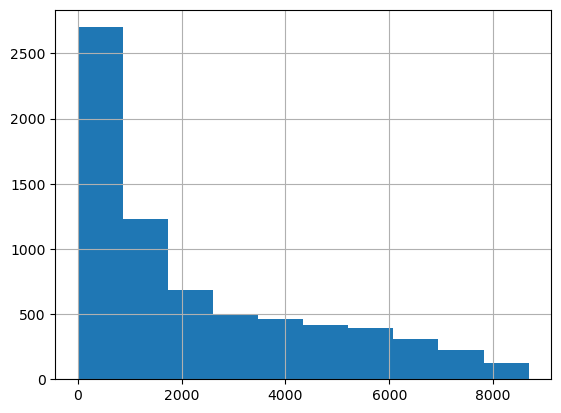

In [156]:
ttotal_charges_df.total_charges.hist()

<AxesSubplot:>

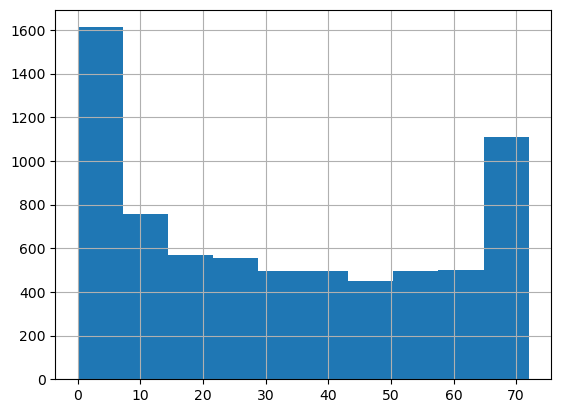

In [157]:
ttotal_charges_df.tenure.hist()

#### distributions are not normal, there for we will use spearman r test

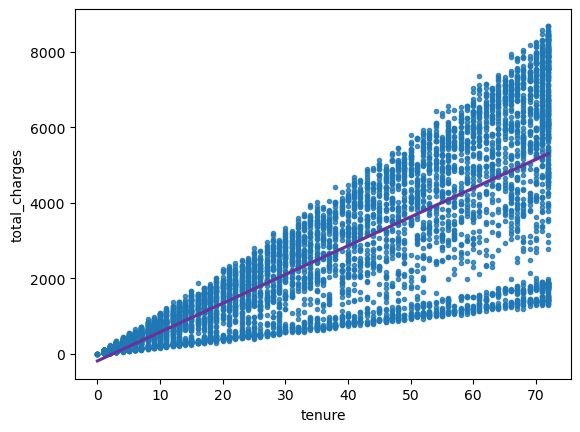

In [158]:
sns.regplot(x = 'tenure', y='total_charges', 
            data = ttotal_charges_df, 
            marker='.', line_kws={'color': 'rebeccapurple'})
plt.show()

In [159]:
r, p = stats.spearmanr(ttotal_charges_df.tenure, ttotal_charges_df.total_charges)

eval_result(alpha, p)

r


Reject the null hypothesis. There is a linear correlation (p-value: 0.0)


0.8896957900597577

#### there is a strong positive linear correlation due to r value being
#### close to one and p value near 0.

### Controlling for phone and internet service

$H_0$ : there is no linear correlation between tenure and monthly charges

$H_a$: there is a linear correlation

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1739 entries, 0 to 7041
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tenure           1739 non-null   int64  
 1   monthly_charges  1739 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 40.8 KB


<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

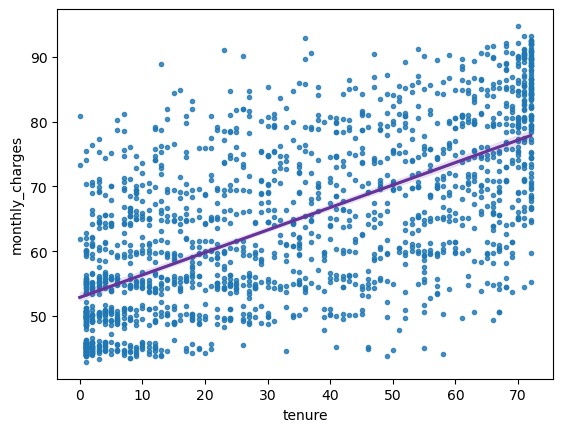

In [162]:
# controlling for phone service only
phone_df = df[(df.phone_service == 'Yes') &\
              (df.internet_service_type_id\
               == 1)][['tenure', 'monthly_charges']]
phone_df.info()
sns.regplot(x='tenure', y='monthly_charges', data=phone_df, marker='.', 
            line_kws=({'color': 'rebeccapurple'}))




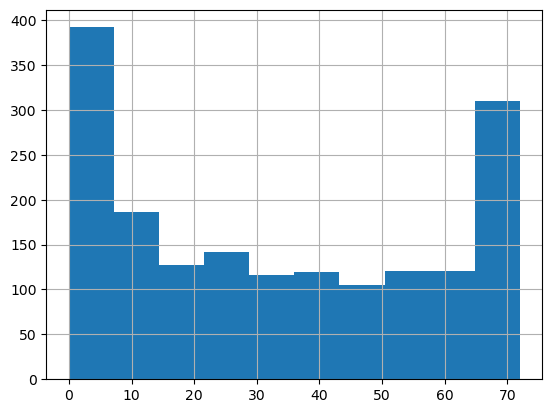

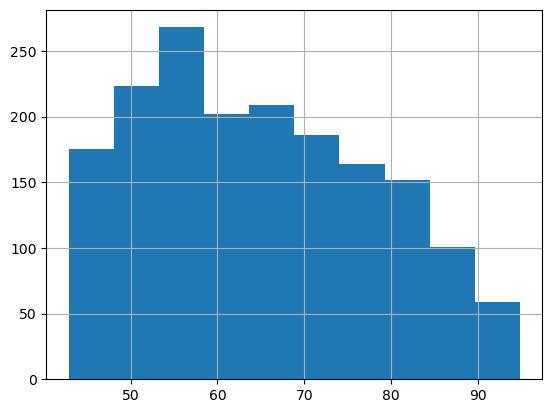

In [163]:
phone_df.tenure.hist()
plt.show()

phone_df.monthly_charges.hist()
plt.show()

In [164]:
#not normal, so we will use spearman
r, p = stats.spearmanr(phone_df.tenure, phone_df.monthly_charges)

eval_result(alpha, p)

print(f'r value = {r}')

Reject the null hypothesis. There is a linear correlation (p-value: 5.423601644635052e-222)
r value = 0.6644708508462759


## there is a moderate correlation between monthly charges and tenure of customers who have only phone service

# Question 3 correlations:

**Use the employee database.**
A. Is there a relationship between how long an employee has been with the company and their salary?
B. Is there a relationship between how long an employee has been with the company and the number of titles they have had?


In [165]:

url = get_db_url(env.username, env.password, env.host, db='employees')

In [166]:
query = '''
select * from employees
join salaries using (emp_no)
where to_date = '9999-01-01'
'''

In [167]:
df = pd.read_sql(query, url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      240124 non-null  int64 
 1   birth_date  240124 non-null  object
 2   first_name  240124 non-null  object
 3   last_name   240124 non-null  object
 4   gender      240124 non-null  object
 5   hire_date   240124 non-null  object
 6   salary      240124 non-null  int64 
 7   from_date   240124 non-null  object
 8   to_date     240124 non-null  object
dtypes: int64(2), object(7)
memory usage: 16.5+ MB


#### State hypothesis:
 H_0: there is no linear correlation between employee tenure and salary
 H_a: there is a linear correlation between employee tenure and salary
 

In [168]:
alpha = 0.05

#select data and calculate tenure
#how to write the date and time
df["tenure"] = pd.to_datetime("today") - pd.to_datetime(df.hire_date)

In [169]:
#change a date to string, extract the days and then change to int/float
df["tenure"] = df.tenure.astype('str').str.split(' ', expand = True)[0].astype('int')
tenure_df = df[['tenure', 'salary']]

<AxesSubplot:xlabel='tenure', ylabel='salary'>

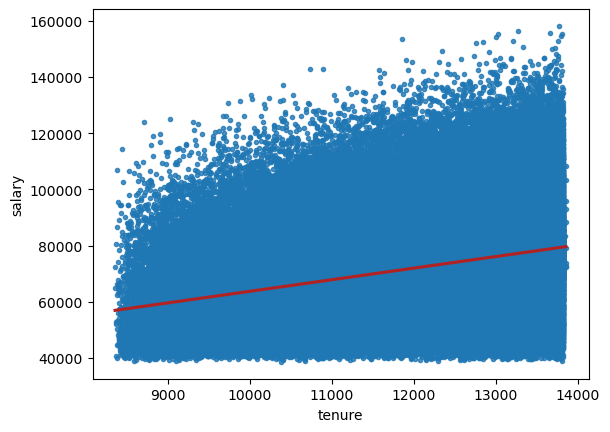

In [170]:
#plot data to check for nomalacy
#scatter plot with line of best fit/ least squares regression line
sns.regplot(x='tenure', y='salary', data=tenure_df,marker='.',\
            line_kws=({'color':'firebrick'}))

<AxesSubplot:>

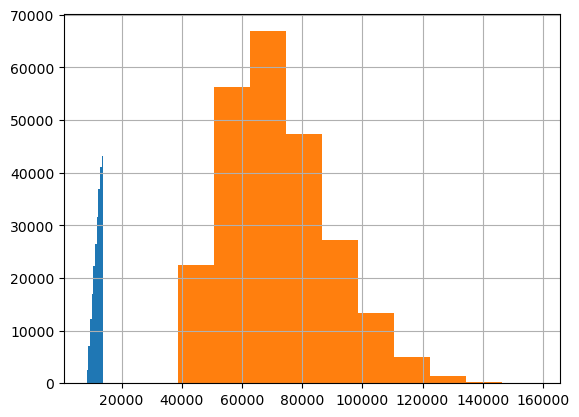

In [171]:
tenure_df.tenure.hist()
tenure_df.salary.hist()
#distributions not normal, therefore use spearman test

In [172]:
r, p = stats.spearmanr(tenure_df.tenure, tenure_df.salary)
print('r value:', r)


r value: 0.3128783525010577


## there is a relationship between tenure and salary

# Is there a relationship between number of titles and tenure

#### H_0: there is no correlation between the two
#### H_a:  there is a correlation

In [173]:
query = '''
select t.emp_no, count(t.title) as num_titles, te.tenure 
from titles t
join(select emp_no, datediff(now(), min(from_date)) 
		as tenure 
		from titles
		group by emp_no
		having max(to_date) = '9999-01-01') te using(emp_no)
group by t.emp_no;
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   emp_no      240124 non-null  int64
 1   num_titles  240124 non-null  int64
 2   tenure      240124 non-null  int64
dtypes: int64(3)
memory usage: 5.5 MB


<AxesSubplot:xlabel='tenure', ylabel='num_titles'>

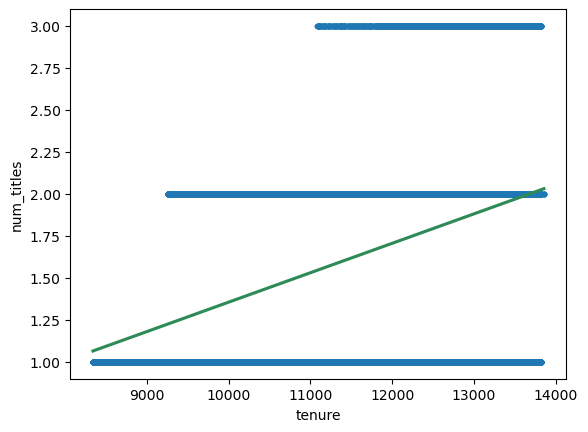

In [174]:
df = pd.read_sql(query, url)
df.info()
df = df [['num_titles', 'tenure']]
sns.regplot(x = 'tenure', y='num_titles', data = df, marker = '.', line_kws =({'color': 'seagreen'}))

because the number of titles is a discrete value, we should run an ANOVA or a kruskal Wallis test to test whether the average salary of those with 1 title is different from those with 2, or 2 different from 3, etc. 

Assumptions:
- do they have equal variance?
- are there enough observations? YES
- are they independent of each other? YES

#observations

In [175]:
df.num_titles.value_counts()

2    125345
1    111892
3      2887
Name: num_titles, dtype: int64

In [176]:
## equal variance?
#h_o the variance is equal
# h_a the variances are significantly different
stats.levene(df.num_titles, df.tenure)

LeveneResult(statistic=718602.1569097865, pvalue=0.0)

In [177]:
stats.kruskal(df.num_titles, df.tenure)



KruskalResult(statistic=371488.64419334417, pvalue=0.0)

## We reject the null that there is no linear correlation

# Last one about sleep

### H0: there is no linear correlation between days and reaction time
### Ha: there is a linear correlation

In [178]:
df = data('sleepstudy')

In [179]:
# select data
df = df[['Reaction', 'Days']]

<AxesSubplot:xlabel='Days', ylabel='Reaction'>

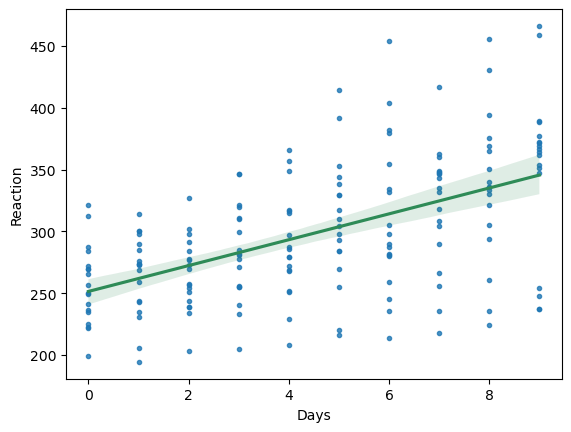

In [180]:
sns.regplot(x='Days', y='Reaction', data=df, marker='.', line_kws=({'color': 'seagreen'}))

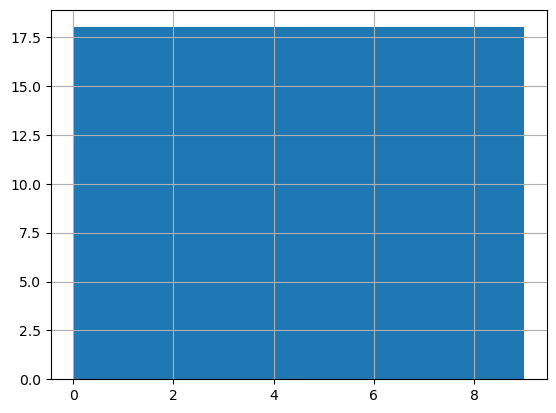

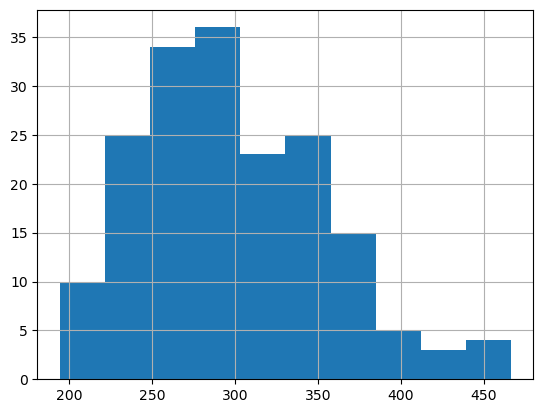

In [181]:
# Check for normal distribution
df.Days.hist()
plt.show()

df.Reaction.hist()
plt.show()

In [182]:
# Days is uniformly distributed and reaction time is normally distributed.
#Run the spearman test

In [183]:
r, p = stats.spearmanr(df.Days, df.Reaction)
print('r value: ', r)

r value:  0.5228138502259547


**Takeaway**
There is a moderate correlation between days and reaction time.

# Chi - Squared Exercises

#### a. Do students get better test grades if they have a rubber duck on their desk?
       independent t test
       
#### b. Does smoking affect when or not someone has lung cancer?
        Chi squared
        
#### c. Is gender independent of a person's blood type?
        Chi Squared

#### d. A farming company wants to know if a new fertilizer has improved a crop yield or not
        one sample t test
        
#### e. Does the length of time of the lecture correlate with a student's grade?
        pearsons r

#### f. Do people with dogs live in apartments more than people with cats?
        chi squared

#### 2. yes, being a code up student does relate to using a macbook

## 3. Choosing 2 categorical variables and performing a chi squared

$H_0$ : there is no relationship between car class and transmission type

$H_a$ : there is a relationship between car class and transmission type

In [184]:
mpg = data('mpg')
mpg['transmission'] = mpg.trans.str[:-4]

In [185]:
observed = pd.crosstab(mpg.transmission, mpg['class'])
observed

class,2seater,compact,midsize,minivan,pickup,subcompact,suv
transmission,,,,,,,
auto,2,24,29,11,20,16,55
manual,3,23,12,0,13,19,7


In [186]:
alpha = 0.05
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [187]:
print('Observed Values\n')
print(observed)
print('\nExpected Values\n')
print(expected.astype('int'))
print(f'chi^2 = {chi2:.4f}') 
print(f'p     = {p:.4f}')

Observed Values

class         2seater  compact  midsize  minivan  pickup  subcompact  suv
transmission                                                             
auto                2       24       29       11      20          16   55
manual              3       23       12        0      13          19    7

Expected Values

[[ 3 31 27  7 22 23 41]
 [ 1 15 13  3 10 11 20]]
chi^2 = 33.7700
p     = 0.0000


### we reject the null. There may exist a relationship between car class and tranmission type.

# 4. Data from employees database 

Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees

$H_0$ : there is no relationship between gender and department

$H_a$ : there is a relationship between gender and department

In [188]:
query = ''' 
select e.gender, d.dept_name
from employees as e
join dept_emp
using (emp_no)
join departments as d
using(dept_no)
where dept_emp.to_date > now();
'''

In [189]:
gender_department = pd.read_sql(query, url)

In [190]:
gender_department

,gender,dept_name
0,M,Customer Service
1,F,Customer Service
2,M,Customer Service
3,F,Customer Service
4,F,Customer Service
...,...,...
240119,F,Sales
240120,M,Sales
240121,M,Sales
240122,F,Sales


In [191]:
observedgender = pd.crosstab(gender_department.gender, \
                            gender_department.dept_name)

In [192]:
alpha = 0.05
chi2, p, degf, expected = stats.chi2_contingency(observedgender)

In [193]:
print('Observed Values\n')
print(observedgender)
print('\nExpected Values\n')
print(expected.astype('int'))
print(f'chi^2 = {chi2:.4f}') 
print(f'p     = {p:.4f}')

Observed Values

dept_name  Customer Service  Development  Finance  Human Resources  Marketing  \
gender                                                                          
F                      7007        24533     5014             5147       5864   
M                     10562        36853     7423             7751       8978   

dept_name  Production  Quality Management  Research  Sales  
gender                                                      
F               21393                5872      6181  14999  
M               31911                8674      9260  22702  

Expected Values

[[ 7024 24544  4972  5157  5934 21312  5816  6173 15074]
 [10544 36841  7464  7740  8907 31991  8729  9267 22626]]
chi^2 = 4.1153
p     = 0.8466


#### due to the high p value, we fail to reject the null and say that there is no relationship between gender and department

## Is an employee's gender independent of whether or not they are or have been a manager?

$H_0$ : there is no relationship between gender and if been a manager

$H_a$ : there is a relationship between gender if been a manager

In [194]:
query = '''
select e.gender, t.title 
from employees as e 
join titles as t
using(emp_no);
'''

In [195]:
managergender = pd.read_sql(query, url)

In [196]:
managergender.head()

,gender,title
0,M,Senior Engineer
1,F,Staff
2,M,Senior Engineer
3,M,Engineer
4,M,Senior Engineer


In [197]:
managergender['is_manager'] = managergender.title == 'Manager'

In [198]:
observedtitle = pd.crosstab(managergender.gender, managergender.is_manager)

In [199]:
observedtitle

is_manager,False,True
gender,,
F,177211,13
M,266073,11


In [200]:
alpha = 0.05
chi2, p, degf, expected = stats.chi2_contingency(observedtitle)

In [201]:
print('Observed Values\n')
print(observedtitle)
print('\nExpected Values\n')
print(expected.astype('int'))
print(f'chi^2 = {chi2:.4f}') 
print(f'p     = {p:.4f}')

Observed Values

is_manager   False  True
gender                  
F           177211    13
M           266073    11

Expected Values

[[177214      9]
 [266069     14]]
chi^2 = 1.4658
p     = 0.2260


### based on our test, we fail to reject the null. There appears to be no relationship between gender and whether or not an employee was a manager

# Bonus Content